In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
WOS_papers = pd.read_excel("./WOS/wos.xls")

In [8]:
WOS_papers.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [9]:
WOS_papers.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Chen, CN; Liu, TK; Chen, YMJ",NaN,NaN,NaN,"Chen, Chao-Nan; Liu, Tung-Kuan; Chen, Yenming J.",NaN,NaN,Human-Machine Interaction: Adapted Safety Assi...,APPLIED SCIENCES-BASEL,...,Science Citation Index Expanded (SCI-EXPANDED)...,Chemistry; Engineering; Materials Science; Phy...,KF8GZ,NaN,gold,NaN,NaN,2024-11-14,WOS:000509476600088,0
1,J,"Efe, B; Kremer, GEO; Kurt, M",NaN,NaN,NaN,"Efe, Burak; Kremer, Gul E. Okudan; Kurt, Mustafa",NaN,NaN,AGE AND GENDER BASED WORKLOAD CONSTRAINT FOR A...,INTERNATIONAL JOURNAL OF INDUSTRIAL ENGINEERIN...,...,Science Citation Index Expanded (SCI-EXPANDED)...,Engineering,GE4XN,NaN,NaN,NaN,NaN,2024-11-14,WOS:000431221200001,0
2,J,"Zimmer, M; Al-Yacoub, A; Ferreira, P; Hubbard,...",NaN,NaN,NaN,"Zimmer, Melanie; Al-Yacoub, Ali; Ferreira, Ped...",NaN,NaN,Experimental study to investigate mental workl...,PRODUCTION AND MANUFACTURING RESEARCH-AN OPEN ...,...,Emerging Sources Citation Index (ESCI),Engineering,2H0KK,NaN,"Green Published, gold",NaN,NaN,2024-11-14,WOS:000813988000001,0
3,C,"Tkitek, Z; Triki, H; Moalla, HF",NaN,"Elayeb, SB; BenAmor, A; Ghorbel, C; Elloumi, S...",NaN,"Tkitek, Zainab; Triki, Hager; Moalla, Hela Frikha",NaN,NaN,Social sustainability in manufacturing system:...,2024 IEEE INTERNATIONAL CONFERENCE ON ADVANCED...,...,Conference Proceedings Citation Index - Scienc...,Engineering,BX3SP,NaN,NaN,NaN,NaN,2024-11-14,WOS:001284658200082,0
4,J,"Joo, T; Shin, D",NaN,NaN,NaN,"Joo, Taejong; Shin, Dongmin",NaN,NaN,Formalizing Human-Machine Interactions for Ada...,IEEE TRANSACTIONS ON HUMAN-MACHINE SYSTEMS,...,Science Citation Index Expanded (SCI-EXPANDED)...,Computer Science,JV3RT,NaN,NaN,NaN,NaN,2024-11-14,WOS:000502284100007,0


                                               keyword  count
0                            human-robot collaboration     14
1                                        human factors     13
2                                         industry 4.0     12
3                            human-machine interaction     11
4                                    augmented reality     10
..                                                 ...    ...
662                          standard welding position      1
663                                    working posture      1
664                                     welding factor      1
665  assembly line worker assignment and balancing ...      1
666                                          petri net      1

[667 rows x 2 columns]


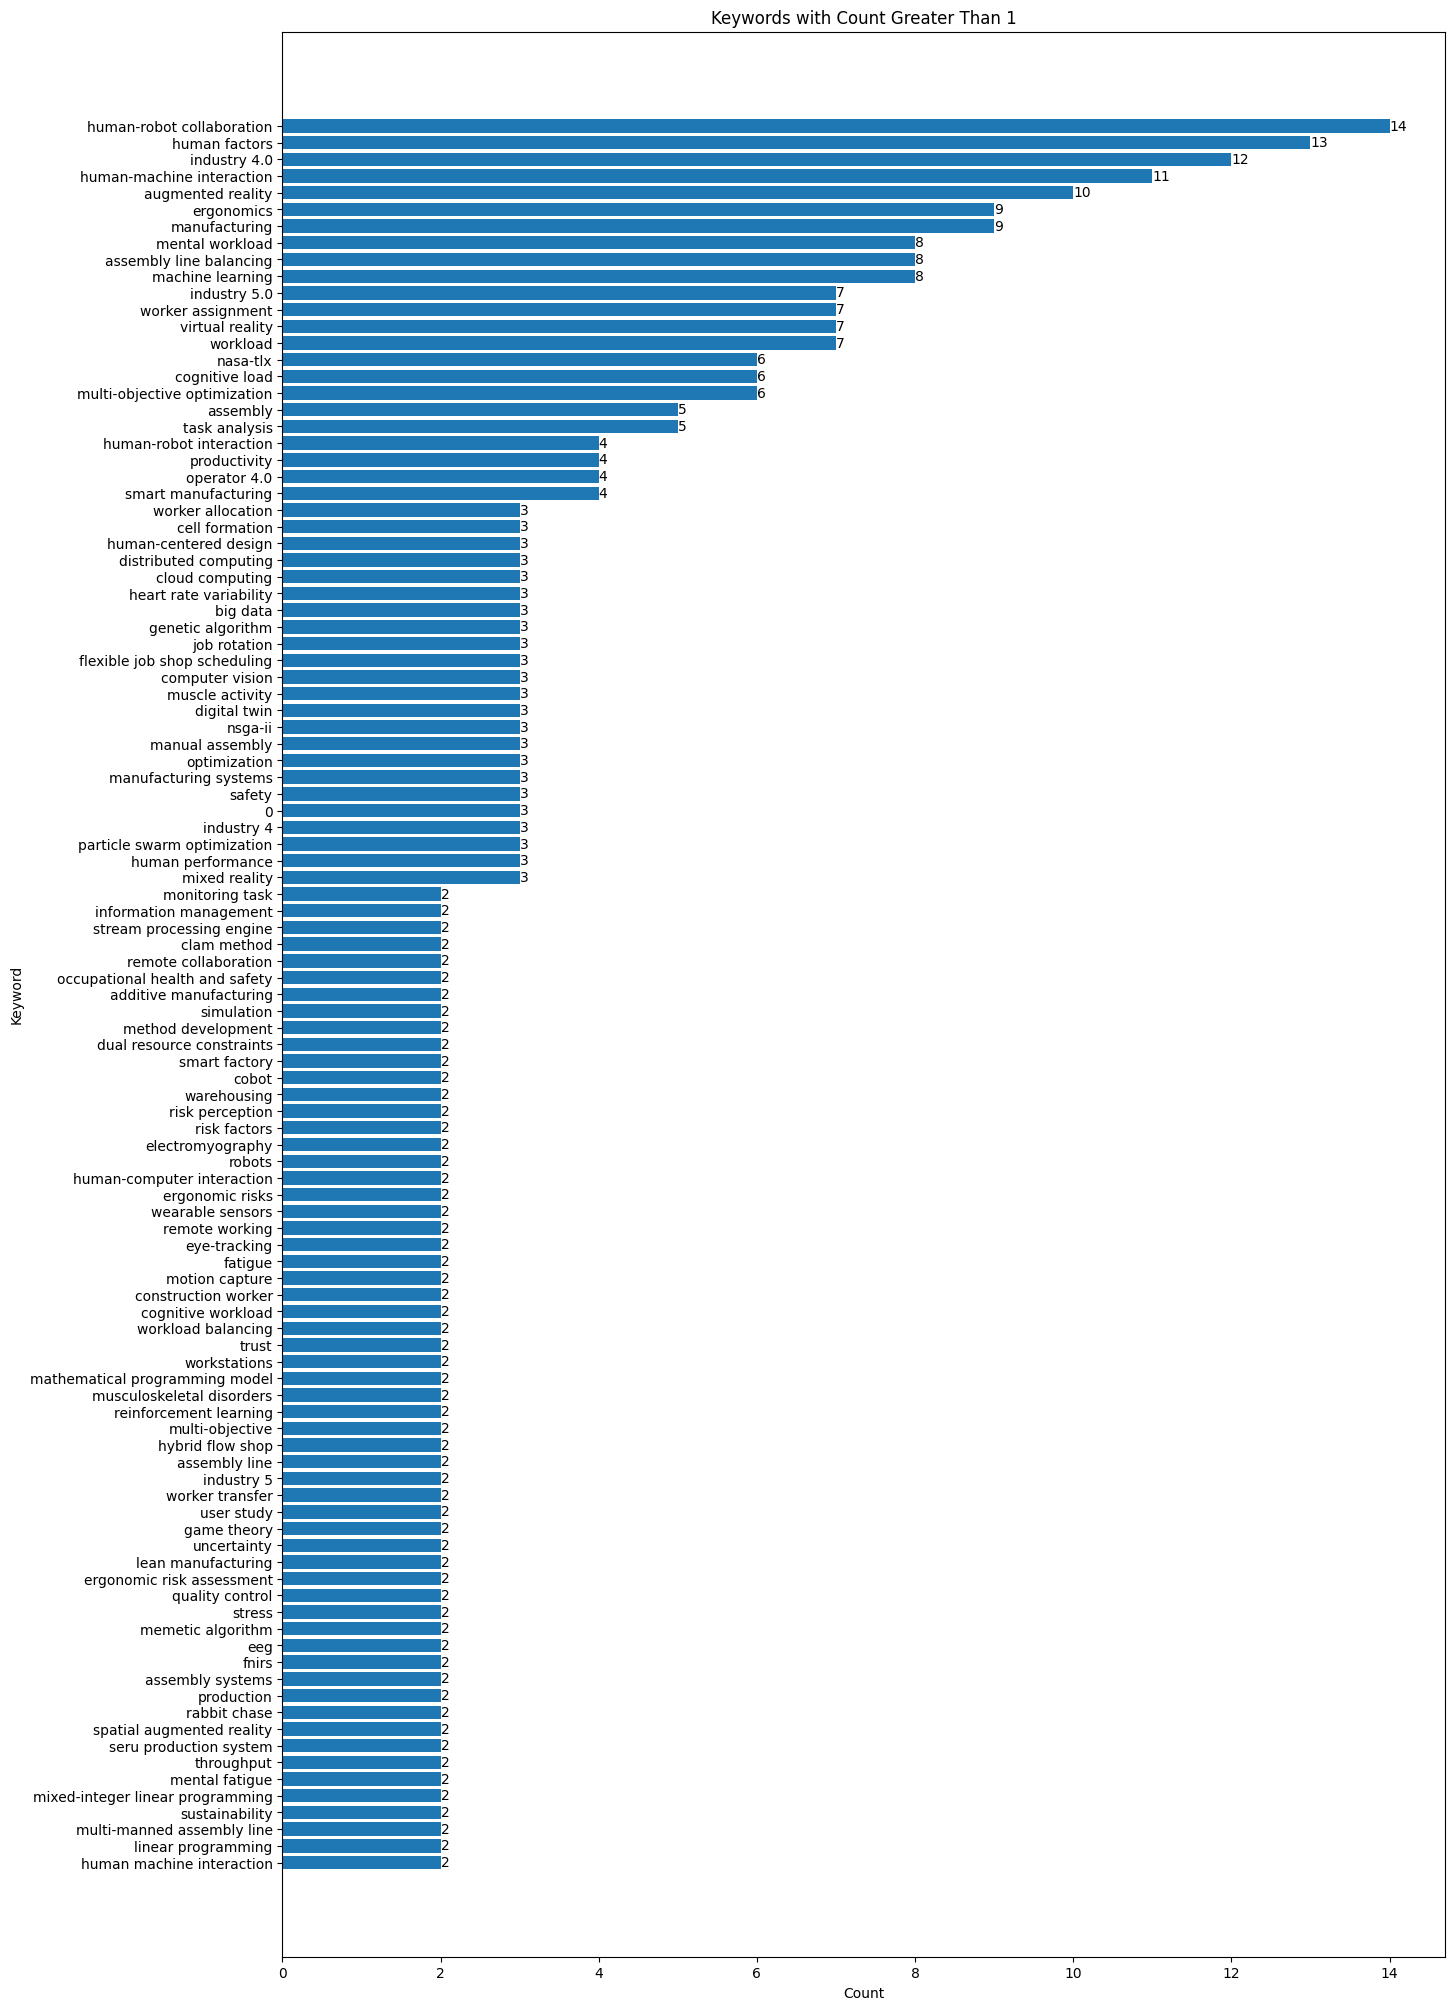

In [10]:
keyword_counts = {}
for i, element in enumerate(WOS_papers[WOS_papers["Author Keywords"].notnull()]["Author Keywords"].unique()):
    split = element.split(";") if type(element) is str else None
    # print(split)
    for kw in split:
        kw = kw.strip().lower()
        if kw not in keyword_counts:
            keyword_counts[kw] = 1
        else:
            keyword_counts[kw] += 1

# Convert the dictionary to a DataFrame
keywords_df = pd.DataFrame(list(keyword_counts.items()), columns=["keyword", "count"])

# Sort the DataFrame by count in descending order (optional)
keywords_df = keywords_df.sort_values(by="count", ascending=False).reset_index(drop=True)

print(keywords_df)

# Filter keywords that have a count greater than 1
keywords_df_filtered = keywords_df[keywords_df["count"] > 1]

# Plotting
plt.figure(figsize=(15, 25))
plt.barh(keywords_df_filtered["keyword"], keywords_df_filtered["count"], align="center")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.title("Keywords with Count Greater Than 1")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top

# Adding count labels at the end of each bar
for index, value in enumerate(keywords_df_filtered["count"]):
    plt.text(value, index, str(value), va="center")

plt.show()

In [11]:
WOS_papers["Cited Reference Count"].sort_values(ascending=False).head(20)

132    274
128    125
145    119
47     117
99     115
129    112
182    108
41     108
149    100
131     98
100     97
102     97
163     93
101     92
48      92
67      88
78      77
43      74
122     73
161     73
Name: Cited Reference Count, dtype: int64

In [12]:
WOS_papers["Keywords Plus"]

0                    FAULT-TREE; SYSTEM; WORKLOAD; MODEL
1      GENETIC ALGORITHM; PARALLEL WORKSTATIONS; PHYS...
2      COGNITIVE LOAD ASSESSMENT; VISUAL INFORMATION;...
3                                                    NaN
4      SITUATION AWARENESS; VERIFICATION; MODEL; PERF...
                             ...                        
179                                             WORKLOAD
180    HEART-RATE-VARIABILITY; STRESS; PERFORMANCE; I...
181    MUSCULOSKELETAL DISORDERS; MUSCULAR-ACTIVITY; ...
182    AUTOMATED DETECTION; SPECTRAL-ANALYSIS; CYCLE ...
183                                           DEEP; AUVS
Name: Keywords Plus, Length: 184, dtype: object

In [13]:
WOS_papers.to_csv("./WOS/WOS.csv")